#Fashion Data Classification
This data contains images of fashion items which are 28x28 pixels. There are 10 classes 

##Model Training

In [1]:
#Needed imports
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

Refactors training code into a function to increase reuseablility. Returns the model so that it can be used to make predictions.

In [19]:
def trainingFunction(xTrain, yTrain, xTest, yTest):
  inputs = tf.keras.Input(shape=(784,))
  dense = layers.Dense(64, activation="relu")
  x = dense(inputs)
  x = layers.Dense(64, activation="relu")(x)
  outputs = layers.Dense(10)(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs, name="M_model")
  model.summary()

  #Compile the model
  model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

  history = model.fit(xTrain, yTrain, batch_size=64, epochs=5, validation_split=0.2)
  testScore = model.evaluate(xTest, yTest, verbose=2)
  print("Test Accuracy: ", testScore[1])

  #Return the model
  return model


In [16]:
  #Seperate data to train against
  (xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.fashion_mnist.load_data()
  xTrain = xTrain.reshape(60000, 784).astype("float32")/255
  xTest = xTest.reshape(10000, 784).astype("float32")/255

In [20]:
#Call the training function
model = trainingFunction(xTrain, yTrain, xTest, yTest)


Model: "M_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.5728 - accuracy: 0.7992 - val_loss: 0.4262 - val_accuracy: 0.8484
Epoch 2/5
750/750 [===========================

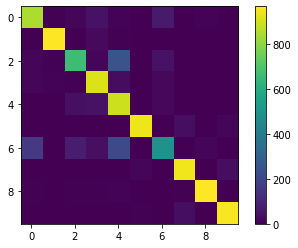

In [21]:
#Call the confusion matrix
confusionMatrix(model, xTest, yTest)

##Fashion Data Confusion Matrix
General function and should work for similar problems

In [7]:
#Additional Confusion Matrix requirements
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [12]:
def confusionMatrix(model, xTest, yTest):
  predictions = model.predict(xTest).argmax(axis=1)
  cMatrix = confusion_matrix(yTest, predictions)
  plt.imshow(cMatrix)
  plt.colorbar()